In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [50]:
path = "Traffic Condition Dataset for Road Capacity Value-20220919T053844Z-001/Traffic Condition Dataset for Road Capacity Value/"
# df = pd.DataFrame(columns={'Days','RushHour','Weather','Temperature','Humidity','Density'})

for i,file in enumerate(os.listdir(path)):
    if i == 0:
        df = pd.read_csv(f"{path}/{file}")
        df['Daerah'] = [i for j in range(len(df))]
    else:
        data = pd.read_csv(f"{path}/{file}")
        data['Daerah'] = [i for j in range(len(data))]
        df = df.append(data, ignore_index=True)

C:\Users\vnang\AppData\Local\Temp\ipykernel_10888\1529883040.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\vnang\AppData\Local\Temp\ipykernel_10888\1529883040.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\vnang\AppData\Local\Temp\ipykernel_10888\1529883040.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\vnang\AppData\Local\Temp\ipykernel_10888\1529883040.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\vnang\AppData\Local

In [51]:
df

,Days,RushHour,Weather,Temperature,Humidity,Density,Daerah
0,4.00000,0.0,0.500,0.740,0.190,2.0,0
1,1.00000,0.0,0.750,0.720,0.430,3.0,0
2,6.00000,0.0,0.620,0.710,0.440,3.0,0
3,3.00000,1.0,0.500,0.740,0.220,3.0,0
4,2.00000,0.0,0.250,0.760,0.550,3.0,0
...,...,...,...,...,...,...,...
575573,0.66667,0.0,0.375,0.281,0.375,0.0,264
575574,0.66667,0.0,0.375,0.281,0.375,0.0,264
575575,0.66667,0.0,0.375,0.292,0.375,0.0,264
575576,0.83333,1.0,0.500,0.236,0.500,0.0,264


In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Perform basic summary statistics
summary_stats = df.describe()
print(summary_stats)

Days           0
RushHour       0
Weather        0
Temperature    0
Humidity       0
Density        0
Daerah         0
dtype: int64
                Days       RushHour        Weather    Temperature  \
count  575578.000000  575578.000000  575578.000000  575578.000000   
mean        2.876611       0.577753       0.500472       0.722559   
std         2.082150       0.493918       0.142963       0.126332   
min         0.000000       0.000000       0.000000       0.190000   
25%         1.000000       0.000000       0.500000       0.740000   
50%         3.000000       1.000000       0.500000       0.760000   
75%         5.000000       1.000000       0.620000       0.760000   
max         6.000000       1.000000       0.880000       0.800000   

            Humidity        Density         Daerah  
count  575578.000000  575578.000000  575578.000000  
mean        0.355326       1.501124     129.473302  
std         0.196999       1.124795      74.853974  
min         0.030000       0.00000

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X = df.drop('Density', axis=1)
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)

In [58]:
print(mse)

0.9357243006933479


Days           0.017040
RushHour      -0.993171
Weather       -2.277303
Temperature    0.536307
Humidity       0.222577
Daerah        -0.000405
dtype: float64


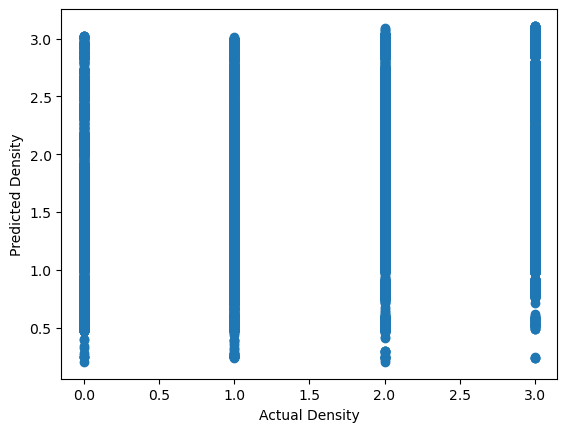

In [56]:
# Print model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.show()


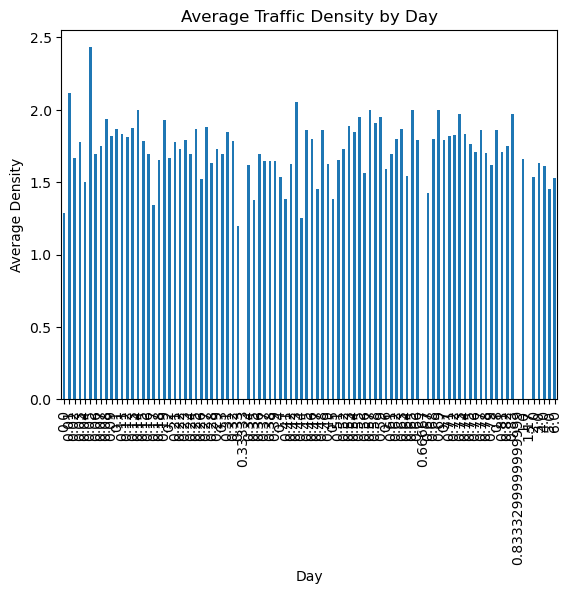

In [57]:
# Create a bar plot of average density by day
average_density_by_day = df.groupby('Days').mean()['Density']
average_density_by_day.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Average Density')
plt.title('Average Traffic Density by Day')
plt.show()

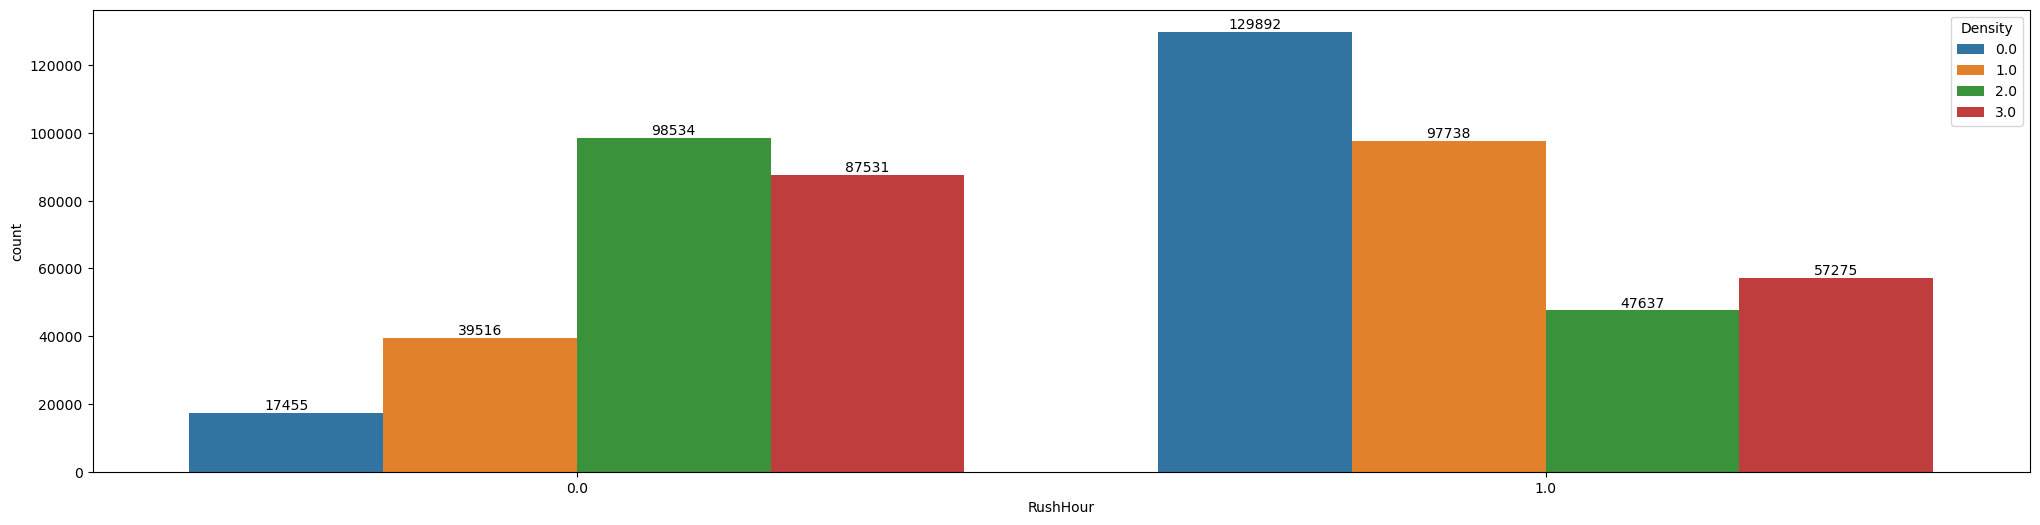

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(25,6))
ax = sns.countplot(ax=axes, data=df, x=df['RushHour'], hue=df['Density'])
for container in ax.containers:
    ax.bar_label(container)

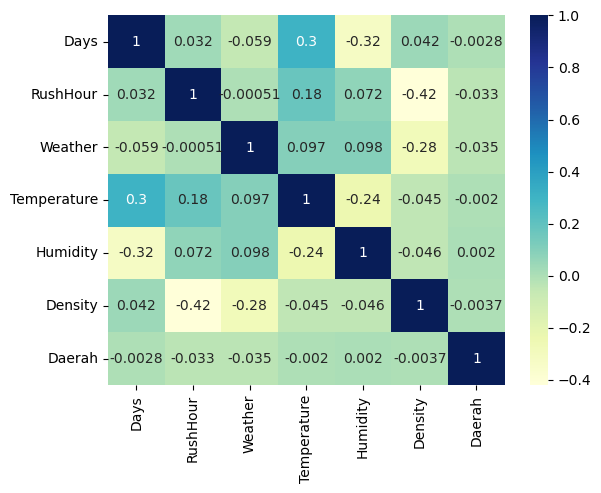

In [8]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

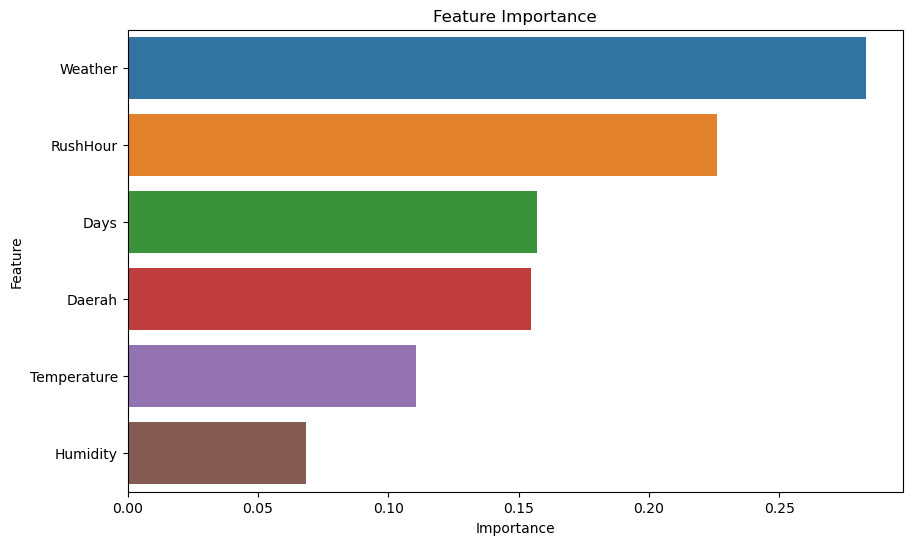

In [59]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Split data into training and testing sets
X = df.drop('Density', axis=1)
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [61]:
import pandas as pd

# Assuming df is your DataFrame
data = df[df['Days'] % 1 == 0]

print(data)


        Days  RushHour  Weather  Temperature  Humidity  Density  Daerah
0        4.0       0.0    0.500        0.740     0.190      2.0       0
1        1.0       0.0    0.750        0.720     0.430      3.0       0
2        6.0       0.0    0.620        0.710     0.440      3.0       0
3        3.0       1.0    0.500        0.740     0.220      3.0       0
4        2.0       0.0    0.250        0.760     0.550      3.0       0
...      ...       ...      ...          ...       ...      ...     ...
575565   1.0       0.0    0.500        0.277     0.500      1.0     264
575566   1.0       0.0    0.625        0.275     0.625      1.0     264
575567   1.0       0.0    0.625        0.275     0.625      1.0     264
575568   1.0       0.0    0.625        0.275     0.625      1.0     264
575577   3.0       1.0    0.500        0.230     0.500      0.0     264

[552264 rows x 7 columns]


In [62]:
data.Days.unique()

array([4., 1., 6., 3., 2., 5., 0.])

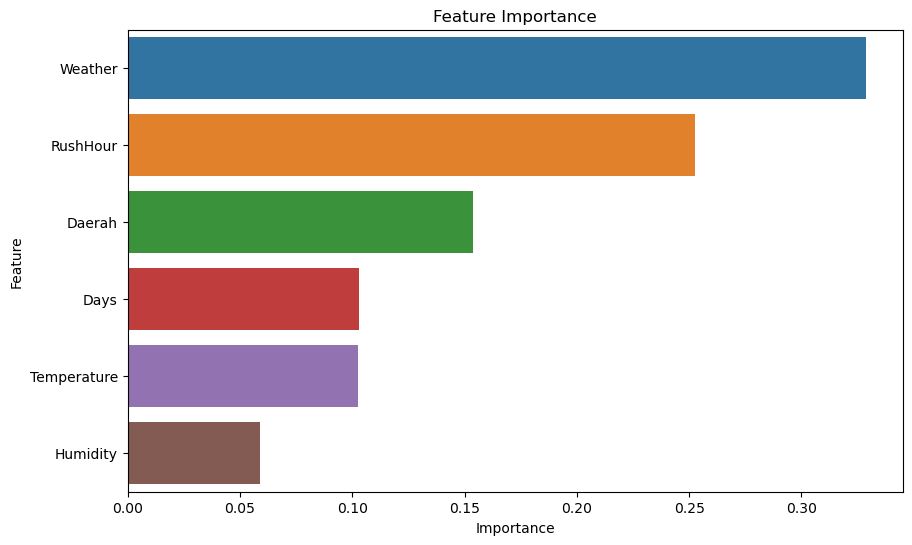

In [63]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Split data into training and testing sets
X = data.drop('Density', axis=1)
y = data['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

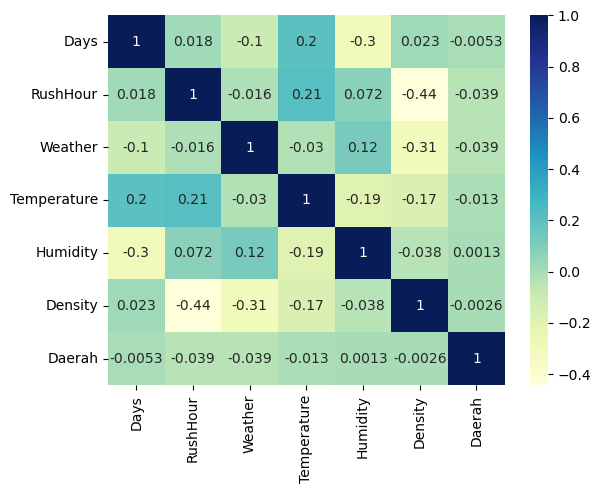

In [64]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(25,6))
ax = sns.countplot(ax=axes, data=df, x=df['RushHour'], hue=df['Density'])
for container in ax.containers:
    ax.bar_label(container)